In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  846 non-null    int64  
 1   Survived     846 non-null    int64  
 2   Pclass       846 non-null    int64  
 3   Name         846 non-null    object 
 4   Sex          846 non-null    int64  
 5   Age          846 non-null    float64
 6   SibSp        846 non-null    int64  
 7   Parch        846 non-null    int64  
 8   Ticket       846 non-null    object 
 9   Fare         846 non-null    float64
 10  Embarked_Q   846 non-null    bool   
 11  Embarked_S   846 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 74.4+ KB


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embark

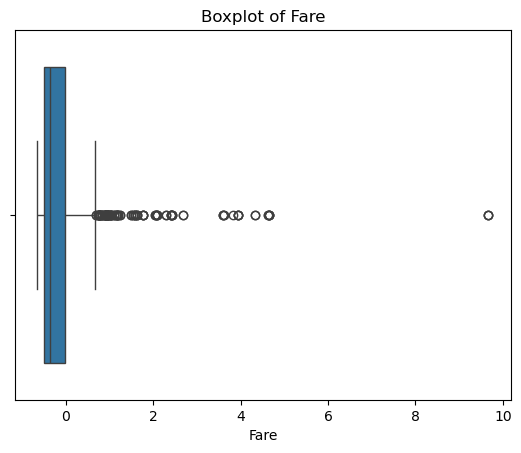


Cleaned Dataset Preview:

Cleaned dataset saved as 'cleaned_titanic.csv'


In [12]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

print("\nData Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())


# Fill Age with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)



if df['Embarked'].isnull().sum() > 0:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

df.dropna(inplace=True)


# Encode Sex
if df['Sex'].dtype == 'object':
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()


fare_limit = df['Fare'].quantile(0.95)
df = df[df['Fare'] < fare_limit]


print("\nCleaned Dataset Preview:")
df.head()


df.to_csv("cleaned_titanic.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_titanic.csv'")

In [14]:
# Save the cleaned DataFrame to a CSV file
df.to_csv("cleaned_titanic.csv", index=False)
print("Cleaned dataset saved as cleaned_titanic.csv")

Cleaned dataset saved as cleaned_titanic.csv
